# LCA Metals Dataset - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the LCA metals dataset, including:
- Data loading and overview
- Distribution analysis of environmental parameters
- Missing values identification
- Summary statistics for circularity parameters
- Correlation analysis between environmental and circularity parameters
- Data cleaning and preprocessing

## 1. Import Required Libraries

In [6]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the CSV Dataset

In [7]:
# Load the dataset
df = pd.read_csv('../data/improved_realistic_lca_metals.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("Column Names and Data Types:")
print("="*50)
print(df.dtypes)

print("\n" + "="*50)
print("First 5 rows:")
print("="*50)
print(df.head())

print("\n" + "="*50)
print("Dataset Info:")
print("="*50)
df.info()

Dataset Shape: (4000, 13)

Column Names and Data Types:
Metal                            object
Process_Type                     object
End_of_Life                      object
Energy_Use_MJ_per_kg            float64
Emission_kgCO2_per_kg           float64
Water_Use_l_per_kg              float64
Transport_km                    float64
Recycled_Content_pct            float64
Reuse_Potential_score           float64
Circularity_Index               float64
Cost_per_kg                     float64
Product_Life_Extension_years    float64
Waste_kg_per_kg_metal           float64
dtype: object

First 5 rows:
    Metal Process_Type End_of_Life  Energy_Use_MJ_per_kg  \
0  Silver      Primary  Landfilled                322.03   
1    Gold     Recycled      Reused                312.78   
2    Lead       Hybrid      Reused                 73.84   
3  Silver       Hybrid      Reused                175.13   
4     Tin     Recycled    Recycled                 58.23   

   Emission_kgCO2_per_kg  Water_Us

## 3. Check Distribution of Environmental Parameters

Let's analyze the distribution of Energy_Use, Emission, and Water_Use parameters.

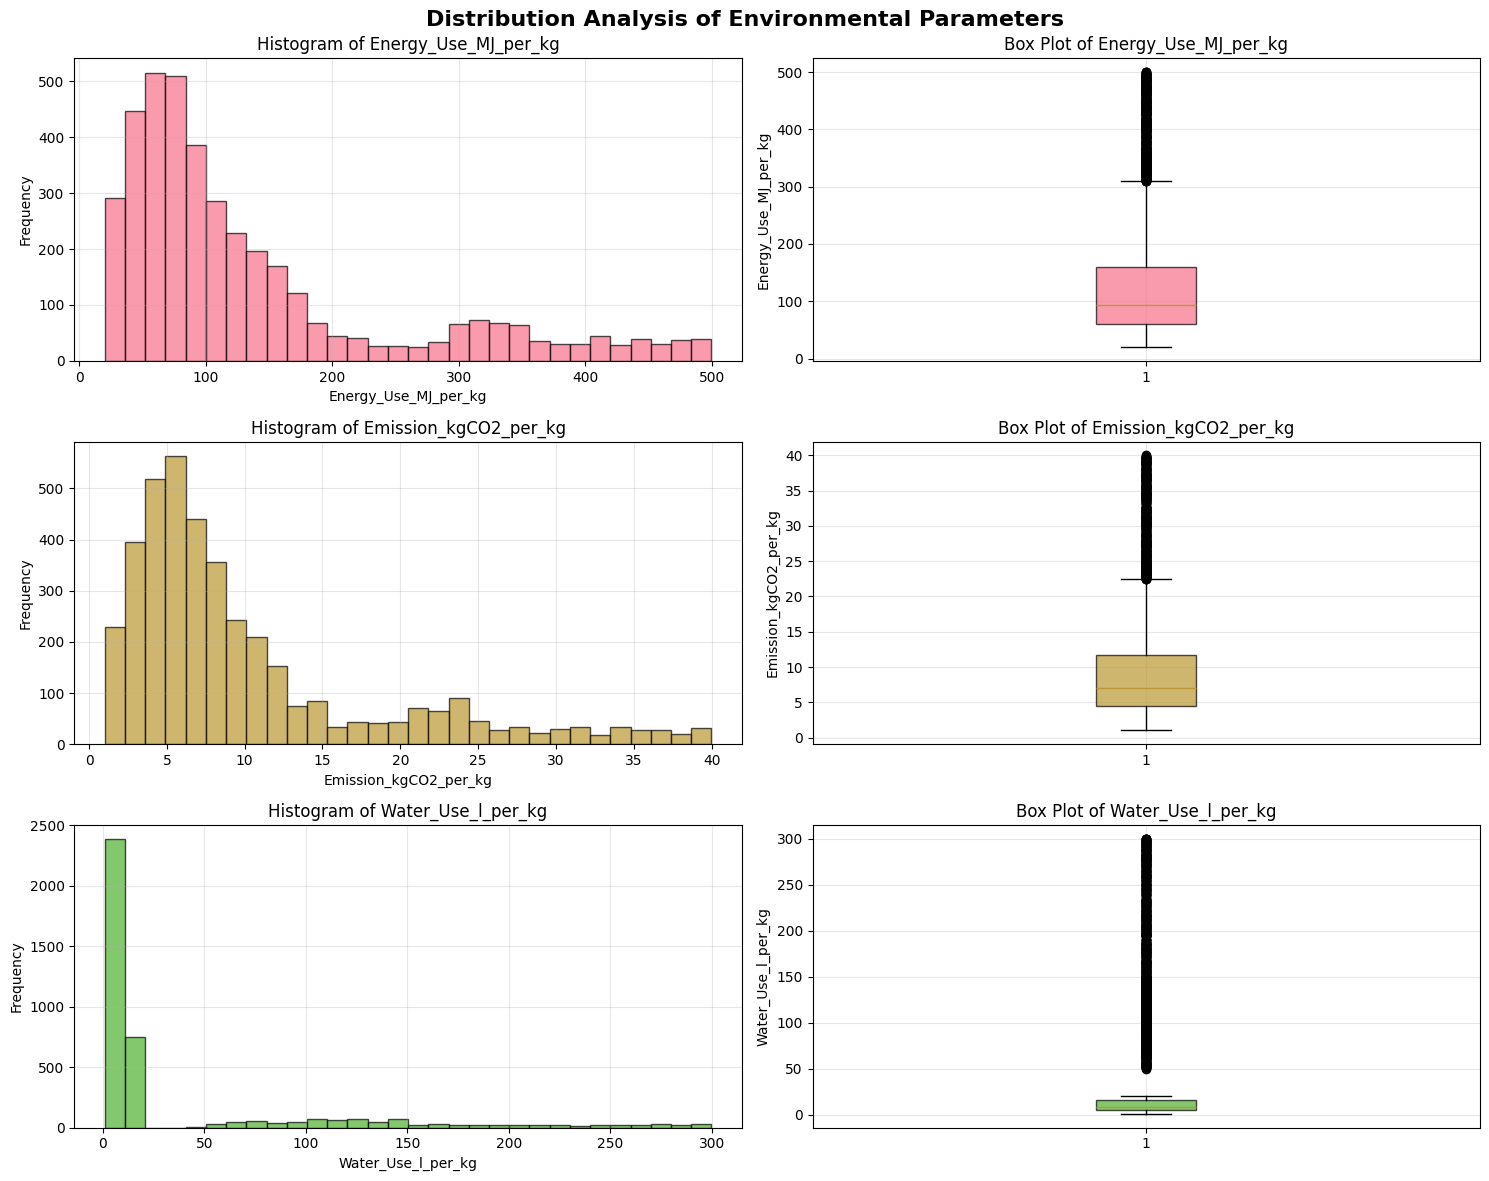

DESCRIPTIVE STATISTICS FOR ENVIRONMENTAL PARAMETERS
       Energy_Use_MJ_per_kg  Emission_kgCO2_per_kg  Water_Use_l_per_kg
count           4000.000000            4000.000000         4000.000000
mean             137.487735              10.113505           39.016307
std              115.167945               8.535142           67.285152
min               20.010000               1.010000            1.000000
25%               60.087500               4.530000            5.050000
50%               93.595000               7.015000            8.935000
75%              160.157500              11.692500           16.522500
max              499.850000              39.990000          299.920000


In [8]:
# Define environmental parameters
env_params = ['Energy_Use_MJ_per_kg', 'Emission_kgCO2_per_kg', 'Water_Use_l_per_kg']

# Create figure with subplots for distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Distribution Analysis of Environmental Parameters', fontsize=16, fontweight='bold')

for i, param in enumerate(env_params):
    # Histogram
    axes[i, 0].hist(df[param], bins=30, alpha=0.7, color=sns.color_palette("husl")[i], edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {param}')
    axes[i, 0].set_xlabel(param)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Box plot
    axes[i, 1].boxplot(df[param], patch_artist=True, 
                       boxprops=dict(facecolor=sns.color_palette("husl")[i], alpha=0.7))
    axes[i, 1].set_title(f'Box Plot of {param}')
    axes[i, 1].set_ylabel(param)
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Descriptive statistics for environmental parameters
print("="*60)
print("DESCRIPTIVE STATISTICS FOR ENVIRONMENTAL PARAMETERS")
print("="*60)
print(df[env_params].describe())

## 4. Identify Missing Values

Let's check for missing values across all columns in the dataset.

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame for better visualization
missing_data = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

# Sort by missing count
missing_data = missing_data.sort_values('Missing_Count', ascending=False)

print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
print(missing_data)

# Visualize missing values
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    
    # Bar plot of missing values
    plt.subplot(1, 2, 1)
    missing_data_filtered = missing_data[missing_data['Missing_Count'] > 0]
    plt.bar(range(len(missing_data_filtered)), missing_data_filtered['Missing_Count'])
    plt.xticks(range(len(missing_data_filtered)), missing_data_filtered['Column'], rotation=45)
    plt.title('Missing Values Count by Column')
    plt.ylabel('Number of Missing Values')
    
    # Heatmap of missing values pattern
    plt.subplot(1, 2, 2)
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Pattern')
    
    plt.tight_layout()
    plt.show()
else:
    print("\n🎉 No missing values found in the dataset!")

# Total missing values
total_missing = missing_values.sum()
print(f"\nTotal missing values in dataset: {total_missing}")
print(f"Percentage of complete cases: {((len(df) - df.isnull().any(axis=1).sum()) / len(df)) * 100:.2f}%")

MISSING VALUES ANALYSIS
                          Column  Missing_Count  Missing_Percentage
0                          Metal              0                 0.0
1                   Process_Type              0                 0.0
2                    End_of_Life              0                 0.0
3           Energy_Use_MJ_per_kg              0                 0.0
4          Emission_kgCO2_per_kg              0                 0.0
5             Water_Use_l_per_kg              0                 0.0
6                   Transport_km              0                 0.0
7           Recycled_Content_pct              0                 0.0
8          Reuse_Potential_score              0                 0.0
9              Circularity_Index              0                 0.0
10                   Cost_per_kg              0                 0.0
11  Product_Life_Extension_years              0                 0.0
12         Waste_kg_per_kg_metal              0                 0.0

🎉 No missing values fou

## 5. Generate Summary Statistics for Circularity Parameters

Let's analyze the Circularity_Index, Recycled_Content, and Reuse_Potential parameters.

COMPREHENSIVE SUMMARY STATISTICS FOR CIRCULARITY PARAMETERS
       Circularity_Index  Recycled_Content_pct  Reuse_Potential_score
count        4000.000000           4000.000000            4000.000000
mean            0.398000             49.641750               3.726580
std             0.168642             20.798189               1.724944
min             0.100000              5.040000               1.000000
25%             0.260000             32.587500               2.350000
50%             0.390000             50.100000               3.620000
75%             0.530000             66.255000               4.860000
max             0.800000             89.950000               8.990000

ADDITIONAL STATISTICS

Circularity_Index:
  Skewness: 0.1639
  Kurtosis: -0.8748
  Variance: 0.0284
  Range: 0.7000
  IQR: 0.2700

Recycled_Content_pct:
  Skewness: -0.0268
  Kurtosis: -1.0187
  Variance: 432.5647
  Range: 84.9100
  IQR: 33.6675

Reuse_Potential_score:
  Skewness: 0.5074
  Kurtosis: -0.2330


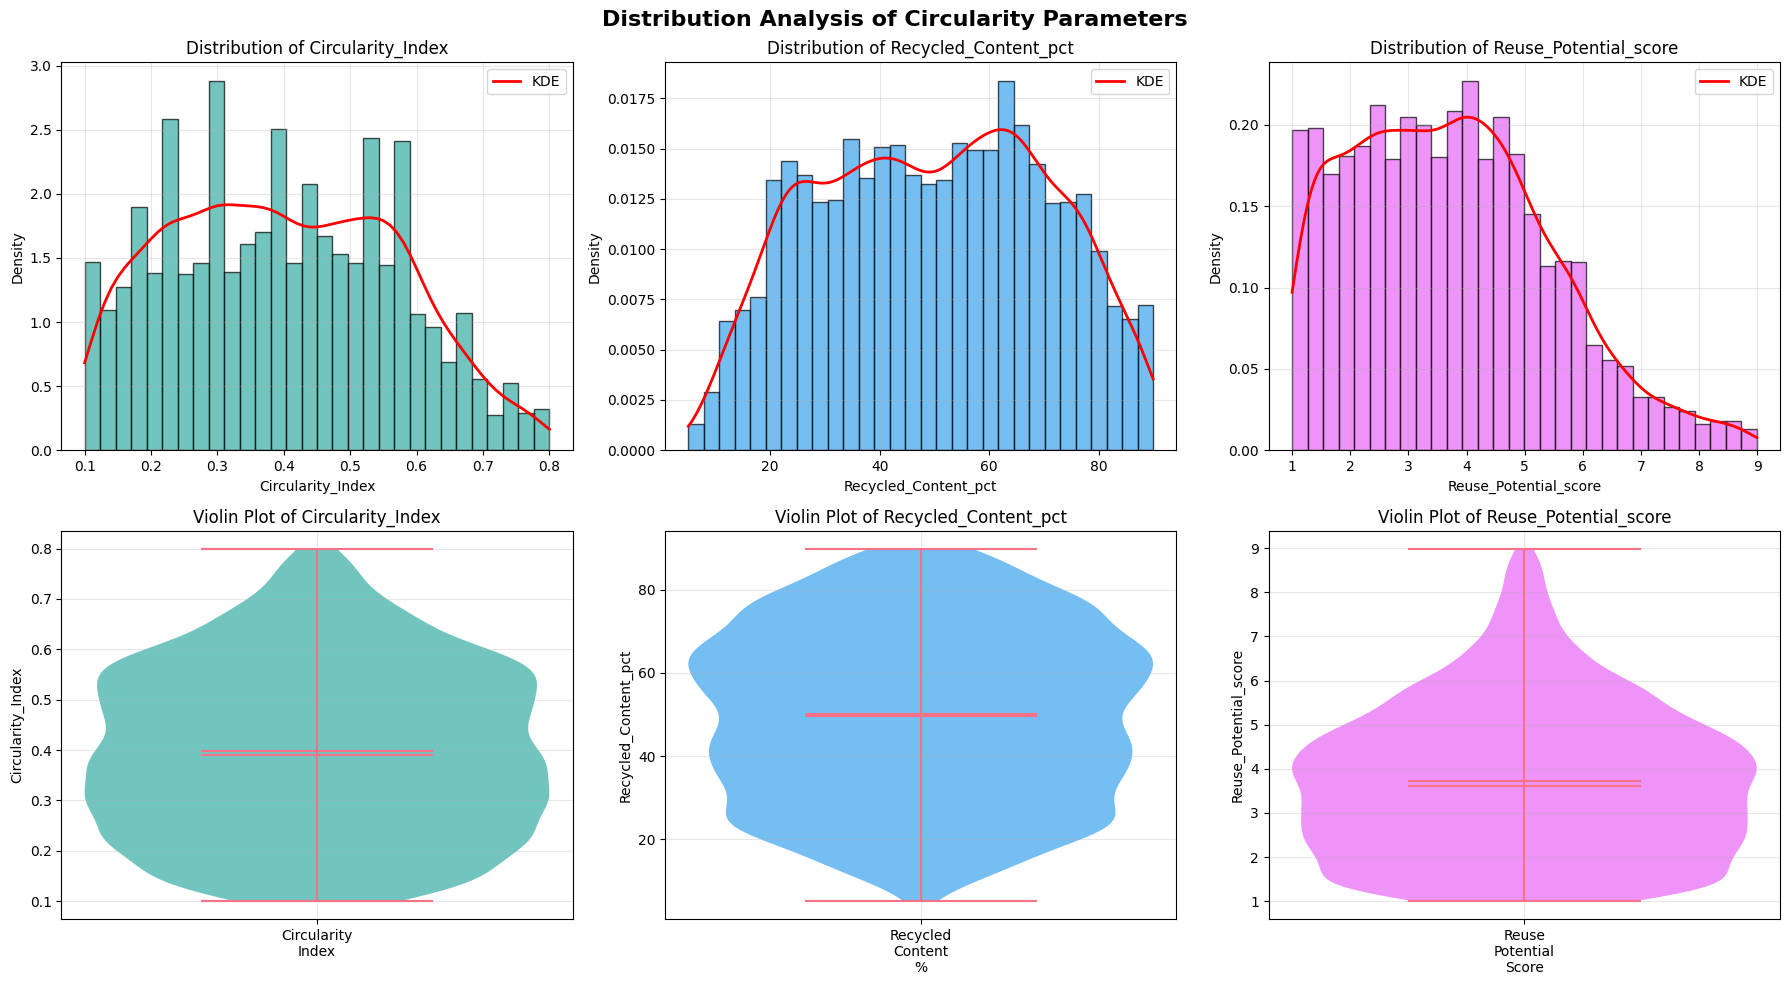

In [10]:
# Define circularity parameters
circularity_params = ['Circularity_Index', 'Recycled_Content_pct', 'Reuse_Potential_score']

# Generate comprehensive summary statistics
print("="*70)
print("COMPREHENSIVE SUMMARY STATISTICS FOR CIRCULARITY PARAMETERS")
print("="*70)

circularity_stats = df[circularity_params].describe()
print(circularity_stats)

# Additional statistics
print("\n" + "="*70)
print("ADDITIONAL STATISTICS")
print("="*70)

for param in circularity_params:
    print(f"\n{param}:")
    print(f"  Skewness: {df[param].skew():.4f}")
    print(f"  Kurtosis: {df[param].kurtosis():.4f}")
    print(f"  Variance: {df[param].var():.4f}")
    print(f"  Range: {df[param].max() - df[param].min():.4f}")
    print(f"  IQR: {df[param].quantile(0.75) - df[param].quantile(0.25):.4f}")

# Visualize distributions of circularity parameters
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution Analysis of Circularity Parameters', fontsize=16, fontweight='bold')

for i, param in enumerate(circularity_params):
    # Histogram with KDE
    axes[0, i].hist(df[param], bins=30, alpha=0.7, color=sns.color_palette("husl")[i+3], 
                    edgecolor='black', density=True)
    axes[0, i].plot(df[param].sort_values(), 
                    stats.gaussian_kde(df[param])(df[param].sort_values()), 
                    color='red', linewidth=2, label='KDE')
    axes[0, i].set_title(f'Distribution of {param}')
    axes[0, i].set_xlabel(param)
    axes[0, i].set_ylabel('Density')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)
    
    # Box plot with violin
    parts = axes[1, i].violinplot([df[param]], positions=[1], showmeans=True, showmedians=True)
    for pc in parts['bodies']:
        pc.set_facecolor(sns.color_palette("husl")[i+3])
        pc.set_alpha(0.7)
    axes[1, i].set_title(f'Violin Plot of {param}')
    axes[1, i].set_ylabel(param)
    axes[1, i].set_xticks([1])
    axes[1, i].set_xticklabels([param.replace('_', '\n').replace('pct', '%').replace('score', 'Score')])
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Visualize Correlation Heatmap

Let's create a correlation heatmap between environmental and circularity parameters.

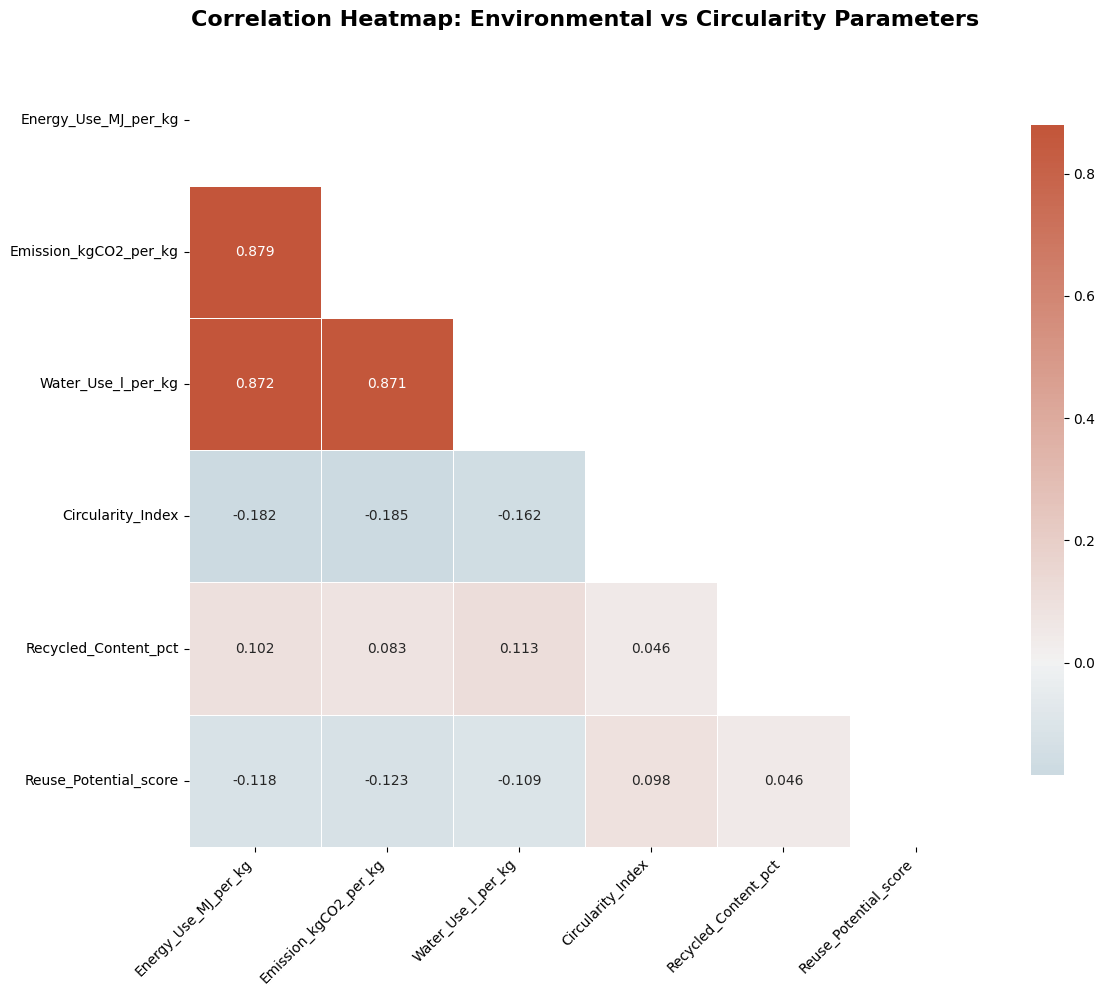

CORRELATION ANALYSIS INSIGHTS

Strong Correlations (|r| > 0.5):
  Energy_Use_MJ_per_kg ↔ Emission_kgCO2_per_kg: 0.879 (Strong Positive)
  Energy_Use_MJ_per_kg ↔ Water_Use_l_per_kg: 0.872 (Strong Positive)
  Emission_kgCO2_per_kg ↔ Water_Use_l_per_kg: 0.871 (Strong Positive)

ENVIRONMENTAL-CIRCULARITY CORRELATIONS

Energy_Use_MJ_per_kg:
  → Circularity_Index: -0.182
  → Recycled_Content_pct: 0.102
  → Reuse_Potential_score: -0.118

Emission_kgCO2_per_kg:
  → Circularity_Index: -0.185
  → Recycled_Content_pct: 0.083
  → Reuse_Potential_score: -0.123

Water_Use_l_per_kg:
  → Circularity_Index: -0.162
  → Recycled_Content_pct: 0.113
  → Reuse_Potential_score: -0.109

CORRELATION MATRIX STATISTICS
Mean correlation (absolute): 0.266
Max correlation: 0.879
Min correlation: -0.185


In [11]:
# Select environmental and circularity parameters for correlation analysis
analysis_columns = env_params + circularity_params
correlation_data = df[analysis_columns]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap=cmap, 
            center=0,
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            fmt='.3f',
            annot_kws={'size': 10})

plt.title('Correlation Heatmap: Environmental vs Circularity Parameters', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print correlation insights
print("="*80)
print("CORRELATION ANALYSIS INSIGHTS")
print("="*80)

# Find strong correlations (absolute value > 0.5)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            strong_correlations.append({
                'Variable_1': correlation_matrix.columns[i],
                'Variable_2': correlation_matrix.columns[j],
                'Correlation': corr_value,
                'Strength': 'Strong Positive' if corr_value > 0.5 else 'Strong Negative'
            })

if strong_correlations:
    print("\nStrong Correlations (|r| > 0.5):")
    for corr in strong_correlations:
        print(f"  {corr['Variable_1']} ↔ {corr['Variable_2']}: {corr['Correlation']:.3f} ({corr['Strength']})")
else:
    print("\nNo strong correlations (|r| > 0.5) found between parameters.")

# Environmental-Circularity correlations specifically
print("\n" + "="*50)
print("ENVIRONMENTAL-CIRCULARITY CORRELATIONS")
print("="*50)
for env_param in env_params:
    print(f"\n{env_param}:")
    for circ_param in circularity_params:
        corr_val = correlation_matrix.loc[env_param, circ_param]
        print(f"  → {circ_param}: {corr_val:.3f}")

# Additional correlation statistics
print(f"\n" + "="*50)
print("CORRELATION MATRIX STATISTICS")
print("="*50)
print(f"Mean correlation (absolute): {np.abs(correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)]).mean():.3f}")
print(f"Max correlation: {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].max():.3f}")
print(f"Min correlation: {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].min():.3f}")

## 7. Data Cleaning and Preprocessing

Let's perform data cleaning and preprocessing steps.

In [12]:
# Create a copy for preprocessing
df_processed = df.copy()

print("="*60)
print("DATA CLEANING AND PREPROCESSING")
print("="*60)

# 1. Check for duplicates
duplicates = df_processed.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df_processed = df_processed.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

# 2. Handle missing values (if any)
missing_before = df_processed.isnull().sum().sum()
if missing_before > 0:
    print(f"Missing values before cleaning: {missing_before}")
    # For numerical columns, we could use median imputation
    numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df_processed[col].isnull().sum() > 0:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
            print(f"Filled missing values in {col} with median: {median_val:.3f}")
else:
    print("No missing values to handle")

# 3. Outlier detection using IQR method
print(f"\n{'-'*40}")
print("OUTLIER DETECTION AND HANDLING")
print(f"{'-'*40}")

outlier_summary = []
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns

for col in analysis_columns:  # Focus on our key analysis columns
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df_processed)) * 100
    
    outlier_summary.append({
        'Column': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': outlier_percentage,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

# 4. Data type optimization
print(f"\n{'-'*40}")
print("DATA TYPE OPTIMIZATION")
print(f"{'-'*40}")

memory_before = df_processed.memory_usage(deep=True).sum() / 1024**2
print(f"Memory usage before optimization: {memory_before:.2f} MB")

# Convert categorical columns to category type
categorical_cols = ['Metal', 'Process_Type', 'End_of_Life']
for col in categorical_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].astype('category')
        print(f"Converted {col} to category type")

memory_after = df_processed.memory_usage(deep=True).sum() / 1024**2
print(f"Memory usage after optimization: {memory_after:.2f} MB")
print(f"Memory saved: {memory_before - memory_after:.2f} MB ({((memory_before - memory_after)/memory_before)*100:.1f}%)")

# 5. Feature engineering - create additional derived features
print(f"\n{'-'*40}")
print("FEATURE ENGINEERING")
print(f"{'-'*40}")

# Environmental Impact Score (normalized combination of key environmental factors)
df_processed['Environmental_Impact_Score'] = (
    (df_processed['Energy_Use_MJ_per_kg'] / df_processed['Energy_Use_MJ_per_kg'].max()) * 0.4 +
    (df_processed['Emission_kgCO2_per_kg'] / df_processed['Emission_kgCO2_per_kg'].max()) * 0.4 +
    (df_processed['Water_Use_l_per_kg'] / df_processed['Water_Use_l_per_kg'].max()) * 0.2
)

# Sustainability Score (combination of circularity parameters)
df_processed['Sustainability_Score'] = (
    df_processed['Circularity_Index'] * 0.4 +
    (df_processed['Recycled_Content_pct'] / 100) * 0.4 +
    (df_processed['Reuse_Potential_score'] / df_processed['Reuse_Potential_score'].max()) * 0.2
)

print("Created new features:")
print("  - Environmental_Impact_Score: Weighted combination of energy, emissions, and water use")
print("  - Sustainability_Score: Weighted combination of circularity parameters")

# 6. Final data quality check
print(f"\n{'-'*40}")
print("FINAL DATA QUALITY CHECK")
print(f"{'-'*40}")

print(f"Final dataset shape: {df_processed.shape}")
print(f"Missing values: {df_processed.isnull().sum().sum()}")
print(f"Duplicate rows: {df_processed.duplicated().sum()}")
print(f"Data types:")
for dtype in df_processed.dtypes.value_counts().index:
    count = df_processed.dtypes.value_counts()[dtype]
    print(f"  {dtype}: {count} columns")

DATA CLEANING AND PREPROCESSING
Number of duplicate rows: 0
No missing values to handle

----------------------------------------
OUTLIER DETECTION AND HANDLING
----------------------------------------
                  Column  Outlier_Count  Outlier_Percentage  Lower_Bound  \
0   Energy_Use_MJ_per_kg            511              12.775    -90.01750   
1  Emission_kgCO2_per_kg            473              11.825     -6.21375   
2     Water_Use_l_per_kg            871              21.775    -12.15875   
3      Circularity_Index              0               0.000     -0.14500   
4   Recycled_Content_pct              0               0.000    -17.91375   
5  Reuse_Potential_score             21               0.525     -1.41500   

   Upper_Bound  
0    310.26250  
1     22.43625  
2     33.73125  
3      0.93500  
4    116.75625  
5      8.62500  

----------------------------------------
DATA TYPE OPTIMIZATION
----------------------------------------
Memory usage before optimization: 0.94 M

## 8. Save Processed Data

Finally, let's save the cleaned and preprocessed dataset.

In [13]:
# Save the processed dataset
output_path = '../data/processed_lca.csv'
df_processed.to_csv(output_path, index=False)

print("="*60)
print("DATA EXPORT COMPLETED")
print("="*60)
print(f"Processed dataset saved to: {output_path}")
print(f"Original dataset shape: {df.shape}")
print(f"Processed dataset shape: {df_processed.shape}")

# Display sample of processed data
print(f"\n{'-'*40}")
print("SAMPLE OF PROCESSED DATA")
print(f"{'-'*40}")
print(df_processed.head())

# Summary of changes made
print(f"\n{'-'*40}")
print("PREPROCESSING SUMMARY")
print(f"{'-'*40}")
print("✅ Dataset loaded successfully")
print("✅ Missing values analysis completed")
print("✅ Distribution analysis performed")
print("✅ Correlation analysis completed")
print("✅ Data cleaning and preprocessing finished")
print("✅ New engineered features created:")
print("   • Environmental_Impact_Score")
print("   • Sustainability_Score")
print("✅ Data type optimization performed")
print("✅ Processed dataset saved")

print(f"\n📊 Final Dataset Summary:")
print(f"   • Rows: {df_processed.shape[0]:,}")
print(f"   • Columns: {df_processed.shape[1]}")
print(f"   • Memory usage: {df_processed.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • Data quality: {((len(df_processed) - df_processed.isnull().any(axis=1).sum()) / len(df_processed)) * 100:.1f}% complete cases")

print(f"\n🎯 Ready for further analysis and modeling!")

DATA EXPORT COMPLETED
Processed dataset saved to: ../data/processed_lca.csv
Original dataset shape: (4000, 13)
Processed dataset shape: (4000, 15)

----------------------------------------
SAMPLE OF PROCESSED DATA
----------------------------------------
    Metal Process_Type End_of_Life  Energy_Use_MJ_per_kg  \
0  Silver      Primary  Landfilled                322.03   
1    Gold     Recycled      Reused                312.78   
2    Lead       Hybrid      Reused                 73.84   
3  Silver       Hybrid      Reused                175.13   
4     Tin     Recycled    Recycled                 58.23   

   Emission_kgCO2_per_kg  Water_Use_l_per_kg  Transport_km  \
0                  16.37              114.32        162.47   
1                  25.70              258.03        191.97   
2                   6.75                1.03        137.65   
3                  15.94               62.59        122.71   
4                   1.13                3.31        133.35   

   Recycled